<h1><center>Blackwell Project: Understanding Customers</center></h1>

*Company Background*
* An electronics retailer
* In business for 40 years
* 30 physical stores in Southeast
* Started selling online 1+ year ago

***Task: mine data for insights that will help us grow our online sales.***

Danielle's Questions:
1. Do customers in different regions spend more per transaction?
2. Which regions spend the most/least?
3. Is there a relationship between number of items purchased and amount spent?

Additional Questions:
* Do customers spend more in online or in-store transactions?
* How much do customers spend per item in online vs. in-store transactions?
* What is the proportion of online vs. in-store transactions in each region?

# Notebook Setup

In [1]:
#import data science pkgs I need
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import data file
df = pd.read_csv('Demographic_Data.csv')

In [3]:
#view first 5 lines of dataframe to confirm it looks as expected
df.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [4]:
#view characteristics of each variable in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


*Notes*  
* 80,000 transactions
* 5 variables:
    * in-store — whether each transaction occurred online or in-store. 1=in-store, 0=online
    * age — customer's age.
    * items — number of items purchased in each transaction.
    * amount — dollar amount spent for each transaction.
    * region — region each transaction occured. 1=North, 2=South, 3=East, 4=West

# Pre-Process the Data

In [5]:
#get rid of duplicate transactions
df = df.drop_duplicates()

In [6]:
#check for missing values
print(df.isnull().sum())

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64


# Exploratory Data Analysis

In [7]:
#view descriptive statistics of dataset 
df.describe()

,in-store,age,items,amount,region
count,79979.000000,79979.000000,79979.000000,79979.000000,79979.000000
mean,0.500006,45.758512,4.505133,835.825727,2.674915
std,0.500003,15.715158,2.061250,721.263650,1.126642
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.120000,2.000000
50%,1.000000,45.000000,4.000000,582.140000,3.000000
75%,1.000000,56.000000,6.000000,1233.400000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


<function matplotlib.pyplot.show(close=None, block=None)>

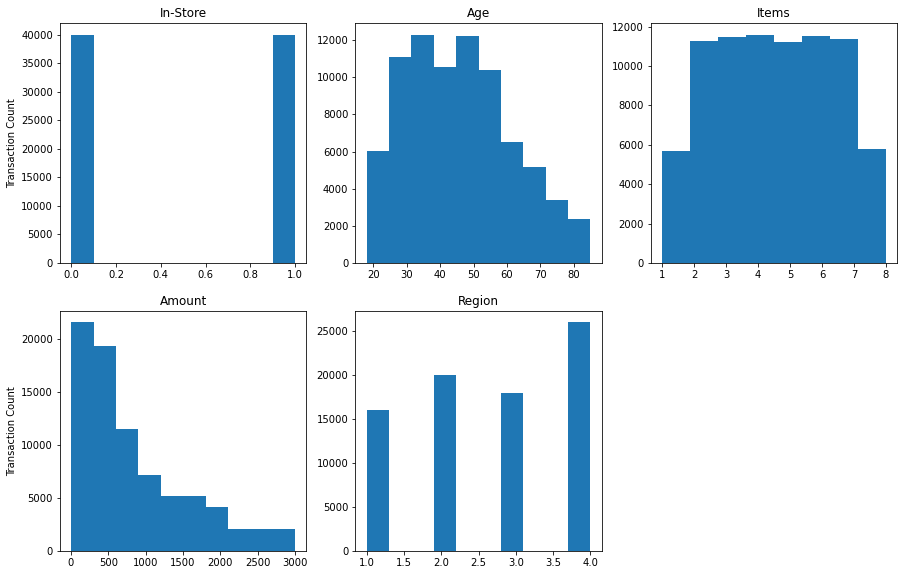

In [8]:
#view histograms of each var in the dataframe
plt.subplots(figsize = (15,15))

#create in-store plot
plt.subplot(3,3,1)
plt.hist(df['in-store'])
plt.title('In-Store')
plt.ylabel('Transaction Count')

#create plot of age
plt.subplot(3,3,2)
plt.hist(df['age'])
plt.title('Age')


#create plot of items
plt.subplot(3,3,3)
plt.hist(df['items'], bins=8)
plt.title('Items')


#create plot of amount
plt.subplot(3,3,4)
plt.hist(df['amount'])
plt.title('Amount')
plt.ylabel('Transaction Count')

#create plot of region
plt.subplot(3,3,5)
plt.hist(df['region'])
plt.title('Region')


plt.show

<blockquote><strong><em>Observations</strong></em>

* 50% of transactions are online and 50% are in-store.
* Customers' ages skew slightly younger, with the bulk between roughly 25-60.
* In most transactions, customers buy 2-7 items.
* The amount customers spend per transaction is significantly skewed to the low end, the most common amount per transaction is less than $250.00.
* The North has the fewest transactions and the West has the most transactions. The South and East fall in between and have roughly the same number of transactions. </blockquote>

---

In [9]:
data_sample=df.sample(1000)
data_sample.head()

,in-store,age,items,amount,region
71246,1,26,3,736.20,4
75663,1,50,2,600.47,3
4832,0,22,2,143.60,3
47593,0,77,8,139.08,2
66906,1,43,4,1458.50,1


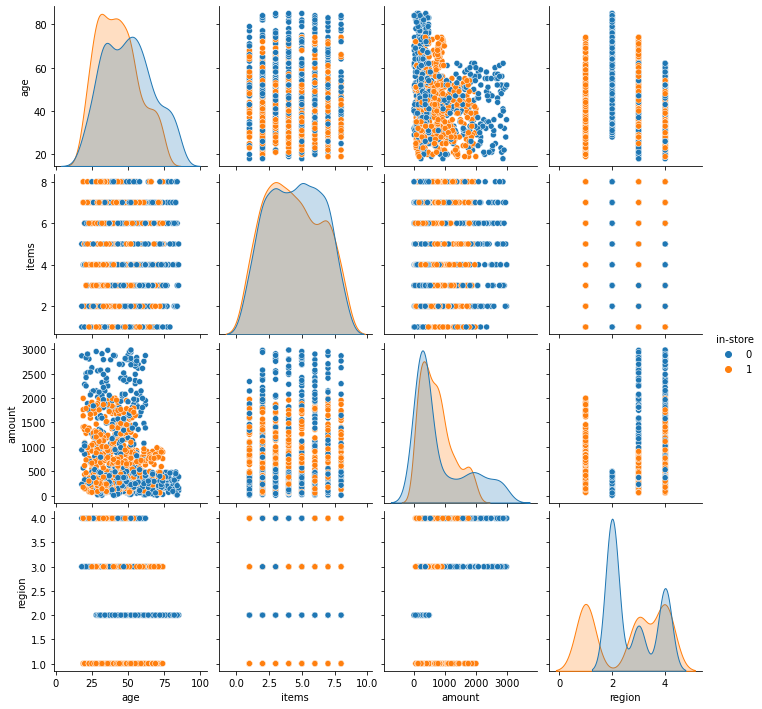

In [10]:
#create cross plot of all variables in df
sns.pairplot(data_sample, hue='in-store', kind='scatter')

# Regional Analysis

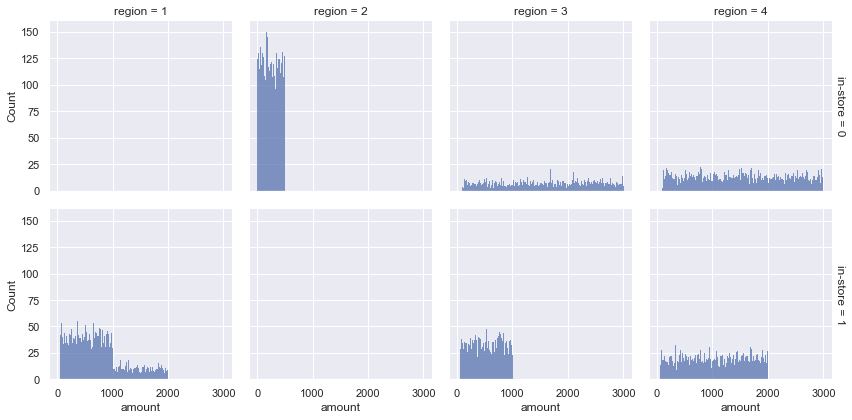

In [11]:
#distribution plot of amount variable in each region for in-store & online
sns.set_theme(style="darkgrid")
sns.displot(
    df, x="amount", col="region", row="in-store",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

## *Do customers in different regions spend more per transaction?*

In [12]:
 df.groupby('region').mean()

,in-store,age,items,amount
region,,,,
1,1.000000,43.704132,4.510283,744.990939
2,0.000000,56.609083,4.512804,252.097741
3,0.611056,45.646944,4.494000,917.969637
4,0.500000,38.752424,4.503771,1283.938357


*Notes*
* It appears by looking at the avg. amount spent per transaction, that the South spends the least per transaction (about 252) and the East spends the most (about 1284). However, we need to look at the mean and mode as well to check whether those numbers are being skewed by outliers. 
* All transactions in the North occurred in-store. *This doesn't make sense since Blackwell's stores are in the Southeast. 
* All transactions in the South region occur online. *This also doesn't make a lot of sense. 
* The average customer in the East  is 15 years younger than the average customer in the South.
* The avg. number of items purchased in each transaction is 4.5 in all regions.

In [13]:
df.groupby('region').median()

,in-store,age,items,amount
region,,,,
1,1.0,43.0,4.0,662.860
2,0.0,57.0,5.0,250.205
3,1.0,45.0,4.0,697.825
4,0.5,39.0,5.0,1230.250


In [14]:
df.groupby('region').std()

,in-store,age,items,amount
region,,,,
1,0.000000,14.085525,2.050402,492.989025
2,0.000000,16.537368,2.065467,142.676946
3,0.487524,14.417935,2.058095,751.409992
4,0.500010,11.886239,2.066920,756.302513


*Notes*
* The median amount spent per transaction is significantly lower than the mean amount spent per transaction in the North and West regions, suggesting there are some expensive outlier transactions in those regions. 
* The relatively small std in amount spent per transaction in the East region suggests most purchases are in a small range around the mean of 250.

In [15]:
#add a new variable to df to map region numbers to their names 
#and temporarily set all = to North
df['region_name']='North'
df.head()

,in-store,age,items,amount,region,region_name
0,0,37,4,281.03,2,North
1,0,35,2,219.51,2,North
2,1,45,3,1525.70,4,North
3,1,46,3,715.25,3,North
4,1,33,4,1937.50,1,North


In [16]:
df.loc[df['region']==2,'region_name']='South'

In [17]:
df.loc[df['region']==3,'region_name']='East'

In [18]:
df.loc[df['region']==4,'region_name']='West'

df.head()

,in-store,age,items,amount,region,region_name
0,0,37,4,281.03,2,South
1,0,35,2,219.51,2,South
2,1,45,3,1525.70,4,West
3,1,46,3,715.25,3,East
4,1,33,4,1937.50,1,North


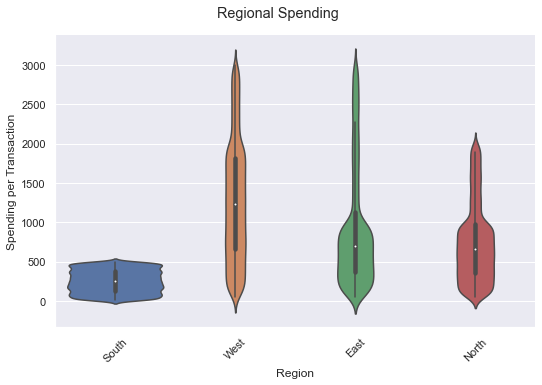

In [19]:
#create violin plot of amount variable in each region
abr=sns.catplot(x = 'region_name', y = 'amount', data = df, kind = 'violin',
            aspect = 1.5)
abr.set_xticklabels( rotation = 45) #argument({'tic 1', 'tic 2',...}, rotation=45)
abr.fig.suptitle('Regional Spending')
abr.fig.subplots_adjust(top=0.9)
abr.set_axis_labels('Region', 'Spending per Transaction')


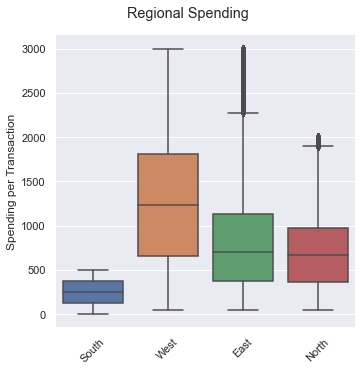

In [20]:
#create box plot of amount variable in each region
abr_box=sns.catplot(x = 'region_name', y = 'amount', data = df, 
                    kind = 'box', aspect = 1)
abr_box.set_xticklabels(rotation = 45)
abr_box.fig.suptitle('Regional Spending')
abr_box.fig.subplots_adjust(top=0.9)
abr_box.set_axis_labels('', 'Spending per Transaction')


***Summary of Findings***  

*Are there regional differences in spending per transaction?*  

Short answer:YES. A quick look at the average amount spent in each region reveals that the Southern region spends the least (about $252.00$). Although it looks like the Eastern region spends the most per transaction (about $1284), further investigation reveals that number is heavily skewed by several outlier transactions. When the outliers are left aside, we can see that typical spendintg in the Eastern and Northern regions are very similar. We can also see that customers in the Western region typically spend the most. One final thing to note is that the amount spent per transaction in the Southern region spans a noteably smaller range than the other three areas, and is concentrated at the low end. 


---
---

###### Create New (Discretized) Age Variables

In [21]:
#define new discritized age variable, two bins: under 65 and 65+
young = pd.cut(df.age, bins=[18,63,84], labels=['Under 65', '65+'])
df.head()

,in-store,age,items,amount,region,region_name
0,0,37,4,281.03,2,South
1,0,35,2,219.51,2,South
2,1,45,3,1525.70,4,West
3,1,46,3,715.25,3,East
4,1,33,4,1937.50,1,North


In [22]:
#define new generation variable
gen = pd.cut(df.age, bins=[18,23,39,55,74,85], labels =['Gen Z (8-23)',
                                                    'Millenial (24-39)',
                                                     'Gen X (40-55)',
                                                     'Boomer (56-74)',
                                                     'Silent Gen (75-95)'])

In [23]:
#add new gen variable to df
df['gen']=gen
df.head()

,in-store,age,items,amount,region,region_name,gen
0,0,37,4,281.03,2,South,Millenial (24-39)
1,0,35,2,219.51,2,South,Millenial (24-39)
2,1,45,3,1525.70,4,West,Gen X (40-55)
3,1,46,3,715.25,3,East,Gen X (40-55)
4,1,33,4,1937.50,1,North,Millenial (24-39)


In [24]:
#add new young variable to df
df['young']=young
df.head()

,in-store,age,items,amount,region,region_name,gen,young
0,0,37,4,281.03,2,South,Millenial (24-39),Under 65
1,0,35,2,219.51,2,South,Millenial (24-39),Under 65
2,1,45,3,1525.70,4,West,Gen X (40-55),Under 65
3,1,46,3,715.25,3,East,Gen X (40-55),Under 65
4,1,33,4,1937.50,1,North,Millenial (24-39),Under 65


## *Which regions spend the most/least?*

This question could be understood to in several different ways. Here I will take it to mean: *which regions spend the most/least as a % of total amount spent in all regions?*


"\nNotes\n\ni keep making bar charts when they don't make any sense. \nin the above chart i wanted to see how much spending was happening in each region. but the above bar chart does not show that. what is the y-axis representing?\nwhat i want is a pie chart showing the percent of total spending that occurs in each region.\nsteps:\nfirst i need to get the sum of the amount variable for each region.\nthen i need to figure out what percent of the total amount each regional sum is.\nthen create a pie chart\n\n"

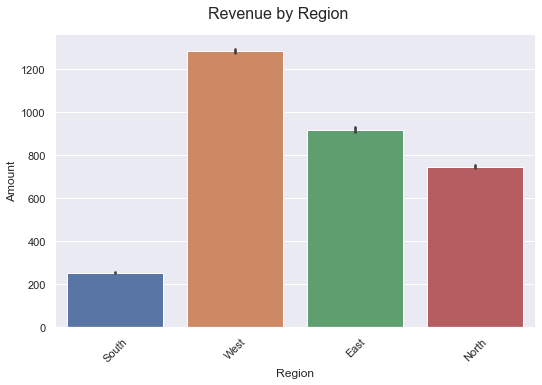

In [25]:
#create bar chart of y=amount, x=region <--this is a stupid bar chart
sns.set_theme(style="darkgrid")
bad=sns.catplot(x = 'region_name', y = 'amount', data = df, kind = 'bar',
            aspect = 1.5)
#add space between top of graph and title
bad.fig.subplots_adjust(top=0.9)
#add and format x-axis tick labels
bad.set_xticklabels( rotation=45)
#set x and y axis labels
bad.set_axis_labels('Region','Amount', fontsize=12)
#add plot title
bad.fig.suptitle('Revenue by Region', fontsize=16)

"""
Notes

i keep making bar charts when they don't make any sense. 
in the above chart i wanted to see how much spending was happening in each region. but the above bar chart does not show that. what is the y-axis representing?
what i want is a pie chart showing the percent of total spending that occurs in each region.
steps:
first i need to get the sum of the amount variable for each region.
then i need to figure out what percent of the total amount each regional sum is.
then create a pie chart

"""

In [26]:
robsum=df.groupby(['region']).sum()
print(robsum)

        in-store      age   items        amount
region                                         
1          15997   699135   72151  1.191762e+07
2              0  1131842   90229  5.040442e+06
3          10999   821645   80892  1.652345e+07
4          12994  1007098  117044  3.336699e+07


In [27]:
amountotal = df['amount'].sum()
print(amountotal)

66848505.79050001


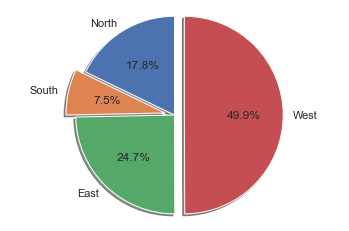

In [28]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'North', 'South', 'East', 'West'
sizes = [17.8, 7.5, 24.7, 49.9]
explode = (0, 0.1, 0, 0.1)  # "explode" 2nd and 3rd slices

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [29]:
df.groupby('region').median()

,in-store,age,items,amount
region,,,,
1,1.0,43.0,4.0,662.860
2,0.0,57.0,5.0,250.205
3,1.0,45.0,4.0,697.825
4,0.5,39.0,5.0,1230.250


***Summary of Findings***  

*Which regions spend the most/least?*

* As we saw in the previous question, customers in the **Southern region** typically spend to **least** per transaction (about 250.00), and customers in the **Western region** typically spend the most (about 1230.00).
* But we can also look at this from the perspective of which regions have the most/least % of the total amount. Perhaps unsurprisingly, we see that the Western region is responsible for almost 50% of all Blackwell sales.

---
---

### *Are there regional differences in online vs. in-store spending?*

In [30]:
df.groupby('in-store').describe()['amount']

,count,mean,std,min,25%,50%,75%,max
in-store,,,,,,,,
0,39989.0,897.546576,880.146928,5.0047,228.1500,441.89,1542.7,3000.0
1,39990.0,774.106421,508.118520,50.0500,368.6225,688.18,1024.4,1999.9


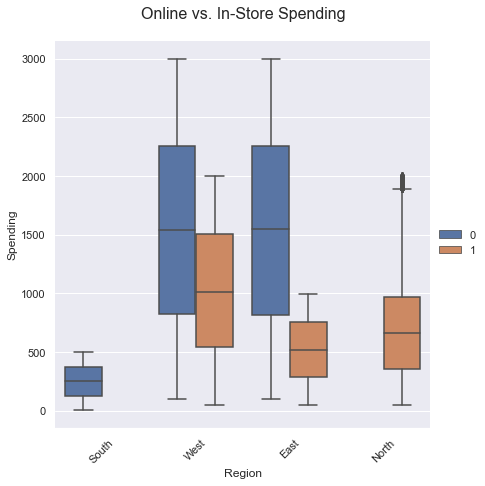

In [31]:
#revenue online vs. in-store by region 
oir = sns.catplot(data=df, kind='box', 
                  x='region_name', y='amount', hue='in-store', height=6)
oir.despine(left=True)
#oir.title("Online vs. In-Store Spending by Region")<--doesn't work
oir.set_xticklabels( rotation=45)
oir.set_axis_labels('Region', 'Spending')
oir.legend.set_title('')
#NA--oir.subplots_adjust(top=0.9)
oir.fig.suptitle("Online vs. In-Store Spending",
                  fontsize=16, fontdict={"weight": "bold"}, y = 1.05)
oir.savefig('oir_plot.png')

***Summary of findings***

* As you can see in the above plot, the Southern region has **only online** sales, and the Northern region has **no online** sales. This makes me wonder whether the data has been corrupted. But assuming the data is sound, the complete lack of online sales in the South presents a big opportunity to establish and grow Blackwell's online sales in the region. 
* Something else we can see in the above graph is that online sales account for all the high dollar transactions. Almost all the sales above $2,100.00$ are online transactions. This suggests two possible stategies (or a combination of the two) to improve Blackwell's online sales: deploy a strategy aimed at growing the high-dollar purchases that currently only take place online. (2) compare the low dollar purchases in-store with low dollar purchases online to see if there are any significant differences to exploit.

## *Do customers differ in age by reigion?*

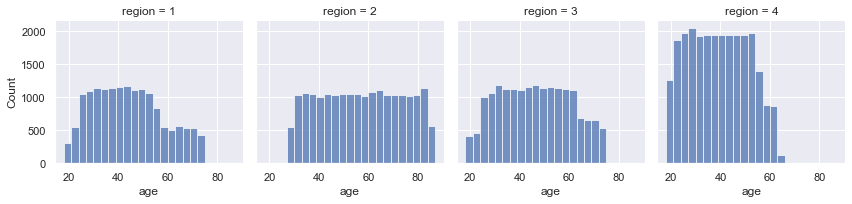

In [32]:
sns.set_theme(style="darkgrid")
sns.displot(
    df, x="age", col="region",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

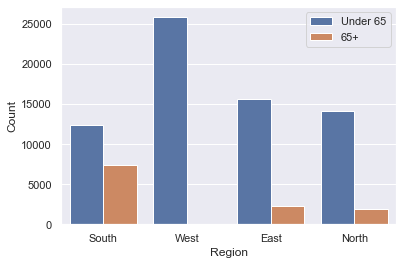

In [33]:
ca = sns.countplot(data=df, 
                  x='region_name', y=None, hue='young')
ca.set(xlabel='Region', ylabel='Count')
ca.legend().set_title('')

#ca.savefig("customerbyregionE.png", format='png',dpi=150)
fig=ca.get_figure()
fig.savefig('pic.png')

*Notes*
* This bar chart tells us that (1) all customers in the Western region are under 65, and the Southern region has the most number of customers over 65. This suggests marketing target at age groups may be more successful in those two regions.
* That being said, the relatively small size of Blackwell's customer base that is 65+ makes it an area for big potential gains.

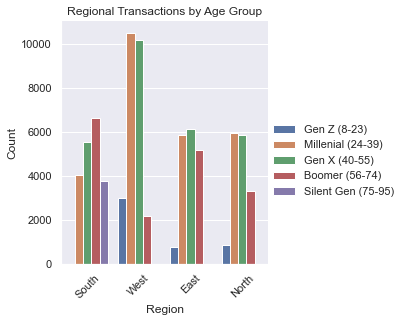

In [34]:
gen_plot = sns.catplot(data=df, 
                  x='region_name', y=None, hue='gen', kind='count', 
                      height=4, aspect=1)
gen_plot.set(xlabel='Region', ylabel='Count',
            title='Regional Transactions by Age Group')
gen_plot.set_xticklabels(rotation=45)

#NA- gen_plot_leg=gen_plot.legend()
#NA- gen_plot.fig.legend(title='', labels=[])
gen_plot.legend.set_title('')
#NA- legend = gen_plot.legend()
#NA- legend.texts[0].set_text('')

#NA- fig=gen_plot.get_figure()
gen_plot.savefig('pic_gen_plot.png')

***Summary of findings***

*Are there regional differences in age amoung our customers?* Yes

* All Blackwell customers of the Silent Generation are in the South.
* Generation Z (18-24 in our sample) is the smallest or next to smallest cohort of customers in every region. In the South, there are no Gen Z customers. When combined with the spending patterns of each cohort this presents a significant opportunity.

---

###### Regional Differences in Spending by Age

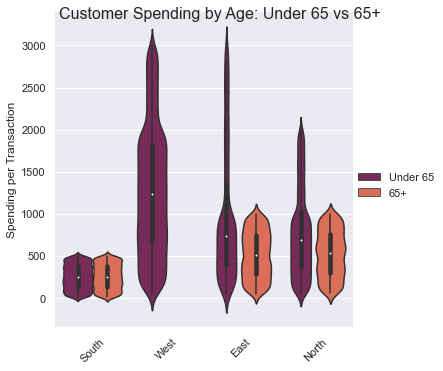

In [35]:
#violin plot of spending by customers under 65 and 65+ in each region
car = sns.catplot(data=df, kind='violin', 
                  x='region_name', y='amount', hue='young',
                  palette='rocket', legend_out=True, ci = None)
car.despine(left=True)
car.set_xticklabels( rotation=45)
car.set_axis_labels('', 'Spending per Transaction')
car.fig.suptitle("Customer Spending by Age: Under 65 vs 65+",
                  fontsize=16, fontdict={"weight": "bold"})
#car.fig.legend(title="", labels=['Online', 'In-store'])
car.legend.set_title('')
car.savefig("customerbyregion.png",
                  format='png',dpi=150)

In [36]:
#calculate mean of age, items, & amount for each gen within each region
gen_mean=df.groupby(['region_name', 'gen'])['age', 'items', 'amount'].mean()
print(gen_mean)


                                      age     items       amount
region_name gen                                                 
East        Gen Z (8-23)        20.954082  4.503827  1584.896097
            Millenial (24-39)   31.656688  4.467841   958.103526
            Gen X (40-55)       47.476020  4.508320   927.122623
            Boomer (56-74)      63.478210  4.496804   751.545588
            Silent Gen (75-95)        NaN       NaN          NaN
North       Gen Z (8-23)        21.157093  4.478312  1018.099817
            Millenial (24-39)   31.661903  4.515131   804.479170
            Gen X (40-55)       47.337918  4.499066   771.135680
            Boomer (56-74)      64.708195  4.529785   520.992073
            Silent Gen (75-95)        NaN       NaN          NaN
South       Gen Z (8-23)              NaN       NaN          NaN
            Millenial (24-39)   33.685424  4.500248   250.351972
            Gen X (40-55)       47.550467  4.505747   252.129675
            Boomer (56-74

<ipython-input-36-2efe97d6df6e>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gen_mean=df.groupby(['region_name', 'gen'])['age', 'items', 'amount'].mean()


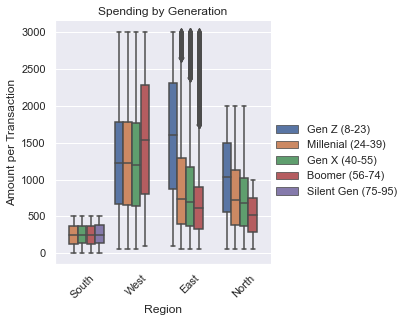

In [37]:
gen_spending_plot = sns.catplot(data=df,
                  x='region_name', y='amount', hue='gen', kind='box', 
                      height=4, aspect=1)
gen_spending_plot.set_xticklabels(rotation=45)
gen_spending_plot.legend.set_title('')
gen_spending_plot.set(xlabel='Region', ylabel='Amount per Transaction',
            title='Spending by Generation')

gen_spending_plot.savefig('gen_spending_plot.png')

In [38]:
#calculate sum of amount & item for each gen within each region
gen_sum=df.groupby(['region_name', 'gen'])['items', 'amount'].sum()
print(gen_sum)


                                  items        amount
region_name gen                                      
East        Gen Z (8-23)         3531.0  1.242559e+06
            Millenial (24-39)   26119.0  5.601073e+06
            Gen X (40-55)       27636.0  5.683262e+06
            Boomer (56-74)      23217.0  3.880230e+06
            Silent Gen (75-95)      NaN           NaN
North       Gen Z (8-23)         3820.0  8.684391e+05
            Millenial (24-39)   26856.0  4.785042e+06
            Gen X (40-55)       26495.0  4.541218e+06
            Boomer (56-74)      14980.0  1.722921e+06
            Silent Gen (75-95)      NaN           NaN
South       Gen Z (8-23)            NaN           NaN
            Millenial (24-39)   18154.0  1.009920e+06
            Gen X (40-55)       25088.0  1.403858e+06
            Boomer (56-74)      30032.0  1.675377e+06
            Silent Gen (75-95)  16955.0  9.512873e+05
West        Gen Z (8-23)        13615.0  3.776900e+06
            Millenial (24-39

<ipython-input-38-e02cd5cdffab>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gen_sum=df.groupby(['region_name', 'gen'])['items', 'amount'].sum()


In [39]:
gen_spending_violin = sns.catplot(data=data_sample,
                  x='region_name', y='amount', hue='gen', kind='violin', 
                      height=8, aspect=2)
gen_spending_violin.set(xlabel='Region', ylabel='Amount Spent',
            title='Spending by Age Group')

ValueError: Could not interpret input 'region_name'

In [ ]:
ageamount =sns.scatterplot(data=df, x='amount',y='age')

In [ ]:
gen_spending_boxen = sns.catplot(data=data_sample,
                  x='region_name', y='amount', hue='gen', kind='boxen', 
                      height=6, aspect=2)
gen_spending_boxen.set(xlabel='Region', ylabel='Amount Spent',
            title='Spending by Age Group')

In [ ]:
#group data by region
df_grouped_rg=df.groupby(['region'])

In [ ]:
df_grouped_rg['age'].describe()

In [ ]:
#sort by age the df grouped by region
df_grouped_rg.sort_values(by ='age', ascending=False)

In [ ]:
#sort df by region then by age 
df.sort_values(by=['region', 'age'])

**Observations**

## Is there a relationship between the number of items purchased and the amount spent?

In [ ]:
corr_mat = df.corr()
print(corr_mat)

In [ ]:
#amount by item 
item_amount = sns.swarmplot(data=df, 
                  x='items', y='amount', hue='in-store', palette='dark')
item_amount.despine(left=True)
item_amount.set_xticklabels( rotation=45)
item_amount.set_axis_labels('Items Purchased', 'Revenu')
item_amount.legend.set_title('')

In [ ]:
f, ax = plt.subplots(figsize=(6.5,6.5))
sns.despine(f, left=True, bottom=True)
sns.scatter